In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
Bitcoin = pd.read_csv('Historic.csv')


In [3]:
Gold = pd.read_csv('Gold.csv')

In [4]:
Gold.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [5]:
Bitcoin.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%


In [6]:
Gold.drop(columns=['Unnamed: 0'], inplace=True)

In [7]:
Gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [8]:
Gold['Date'] = pd.to_datetime(Gold['Date'])

In [9]:
Gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [10]:
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4955 non-null   object
 1   Price     4955 non-null   object
 2   Open      4955 non-null   object
 3   High      4955 non-null   object
 4   Low       4955 non-null   object
 5   Vol.      4955 non-null   object
 6   Change %  4955 non-null   object
dtypes: object(7)
memory usage: 271.1+ KB


In [11]:
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date'])

In [12]:
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4955 non-null   datetime64[ns]
 1   Price     4955 non-null   object        
 2   Open      4955 non-null   object        
 3   High      4955 non-null   object        
 4   Low       4955 non-null   object        
 5   Vol.      4955 non-null   object        
 6   Change %  4955 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 271.1+ KB


In [13]:
Bitcoin['Price'] = Bitcoin['Price'].str.replace(',', '').astype(float)

In [14]:
Bitcoin['Open'] = Bitcoin['Open'].str.replace(',', '').astype(float)

In [15]:
Bitcoin['High'] = Bitcoin['High'].str.replace(',', '').astype(float)

In [16]:
Bitcoin['Low'] = Bitcoin['Low'].str.replace(',', '').astype(float)

In [17]:
Bitcoin['Change %'] = Bitcoin['Change %'].str.rstrip('%').astype(float) / 100

In [18]:
  def convert_vol(value):
    if value == '-':
        return np.nan
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    return float(value)

Bitcoin['Vol.'] = Bitcoin['Vol.'].apply(convert_vol)

In [19]:
Bitcoin = Bitcoin.rename(columns={'Vol.': 'Volume', 'Change %': 'Percentage_change'})

In [20]:
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4955 entries, 0 to 4954
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               4955 non-null   datetime64[ns]
 1   Price              4955 non-null   float64       
 2   Open               4955 non-null   float64       
 3   High               4955 non-null   float64       
 4   Low                4955 non-null   float64       
 5   Volume             4949 non-null   float64       
 6   Percentage_change  4955 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 271.1 KB


In [21]:
Gold = Gold.rename(columns={col: f"{col}_Gold" for col in Gold.columns if col != 'Date'})
Bitcoin = Bitcoin.rename(columns={col: f"{col}_Bitcoin" for col in Bitcoin.columns if col != 'Date'})

In [22]:
merged_df = pd.merge(Gold, Bitcoin, on='Date', how='inner')
merged_df

,Date,Close_Gold,Volume_Gold,Open_Gold,High_Gold,Low_Gold,Price_Bitcoin,Open_Bitcoin,High_Bitcoin,Low_Bitcoin,Volume_Bitcoin,Percentage_change_Bitcoin
0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,41648.0,41293.8,42164.6,40305.4,72640.0,0.0086
1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,41292.7,42763.5,42908.0,40682.6,70350.0,-0.0345
2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,42768.7,43139.1,43192.3,42211.8,50440.0,-0.0087
3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,43145.5,42515.2,43563.7,42093.1,63930.0,0.0149
4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,42835.9,46348.1,46503.2,41857.9,136920.0,-0.0758
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,932.7,943.5,972.6,911.7,10410.0,-0.0115
2507,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,943.5,1007.0,1021.5,937.2,8330.0,-0.0630
2508,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,916.5,944.2,949.5,902.9,6200.0,-0.0292
2509,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,944.2,951.0,958.1,936.3,1970.0,-0.0071


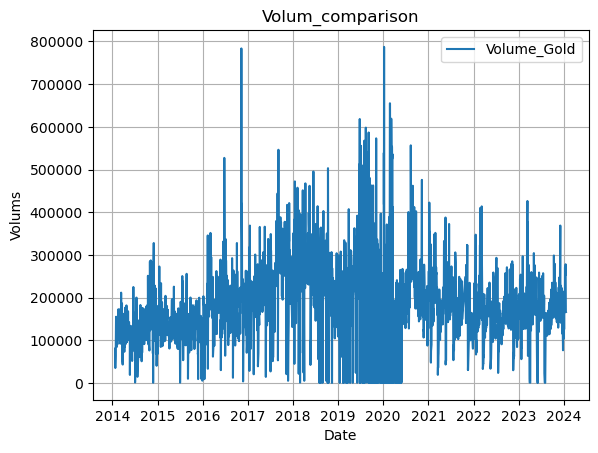

In [23]:
plt.plot(merged_df["Date"], merged_df["Volume_Gold"], label="Volume_Gold")
#plt.plot(merged_df["Date"], merged_df["Volume_Bitcoin"], label="Volume_Bitcoin", marker="s")
plt.xlabel("Date")
plt.ylabel("Volums")
plt.title("Volum_comparison")
plt.legend()
plt.grid(True)

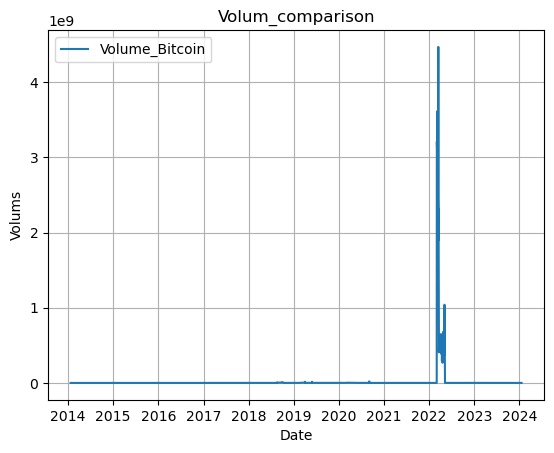

In [24]:
plt.plot(merged_df["Date"], merged_df["Volume_Bitcoin"], label="Volume_Bitcoin")
plt.xlabel("Date")
plt.ylabel("Volums")
plt.title("Volum_comparison")
plt.legend()
plt.grid(True)

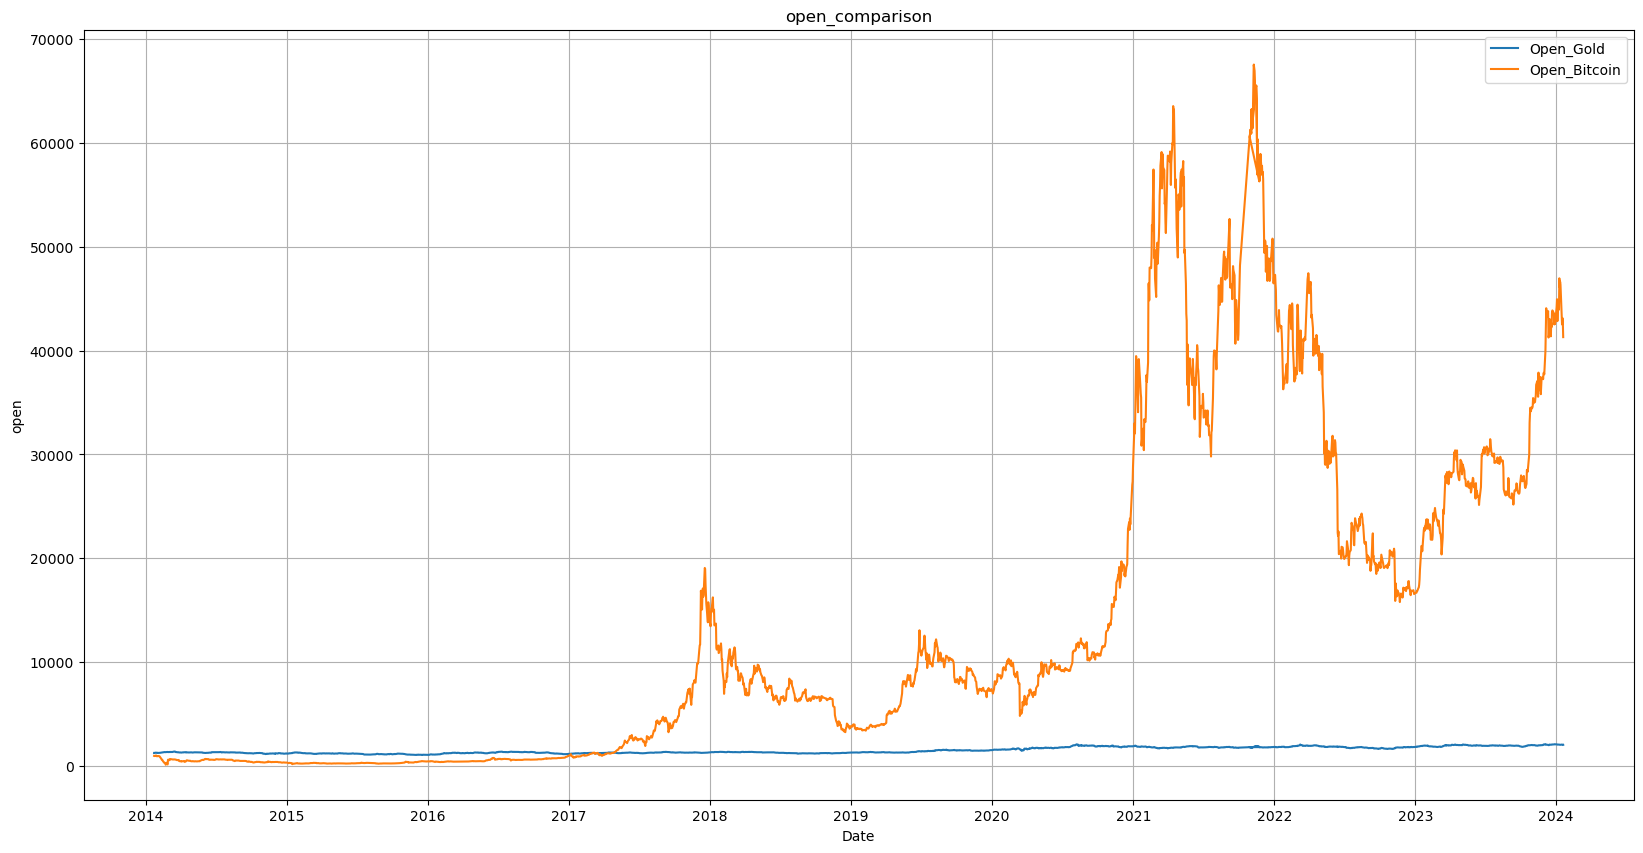

In [82]:
plt.figure(figsize=(20,10))
plt.plot(merged_df["Date"], merged_df["Open_Gold"], label="Open_Gold")
plt.plot(merged_df["Date"], merged_df["Open_Bitcoin"], label="Open_Bitcoin")
plt.xlabel("Date")
plt.ylabel("open")
plt.title("open_comparison")
plt.legend()
plt.grid(True)

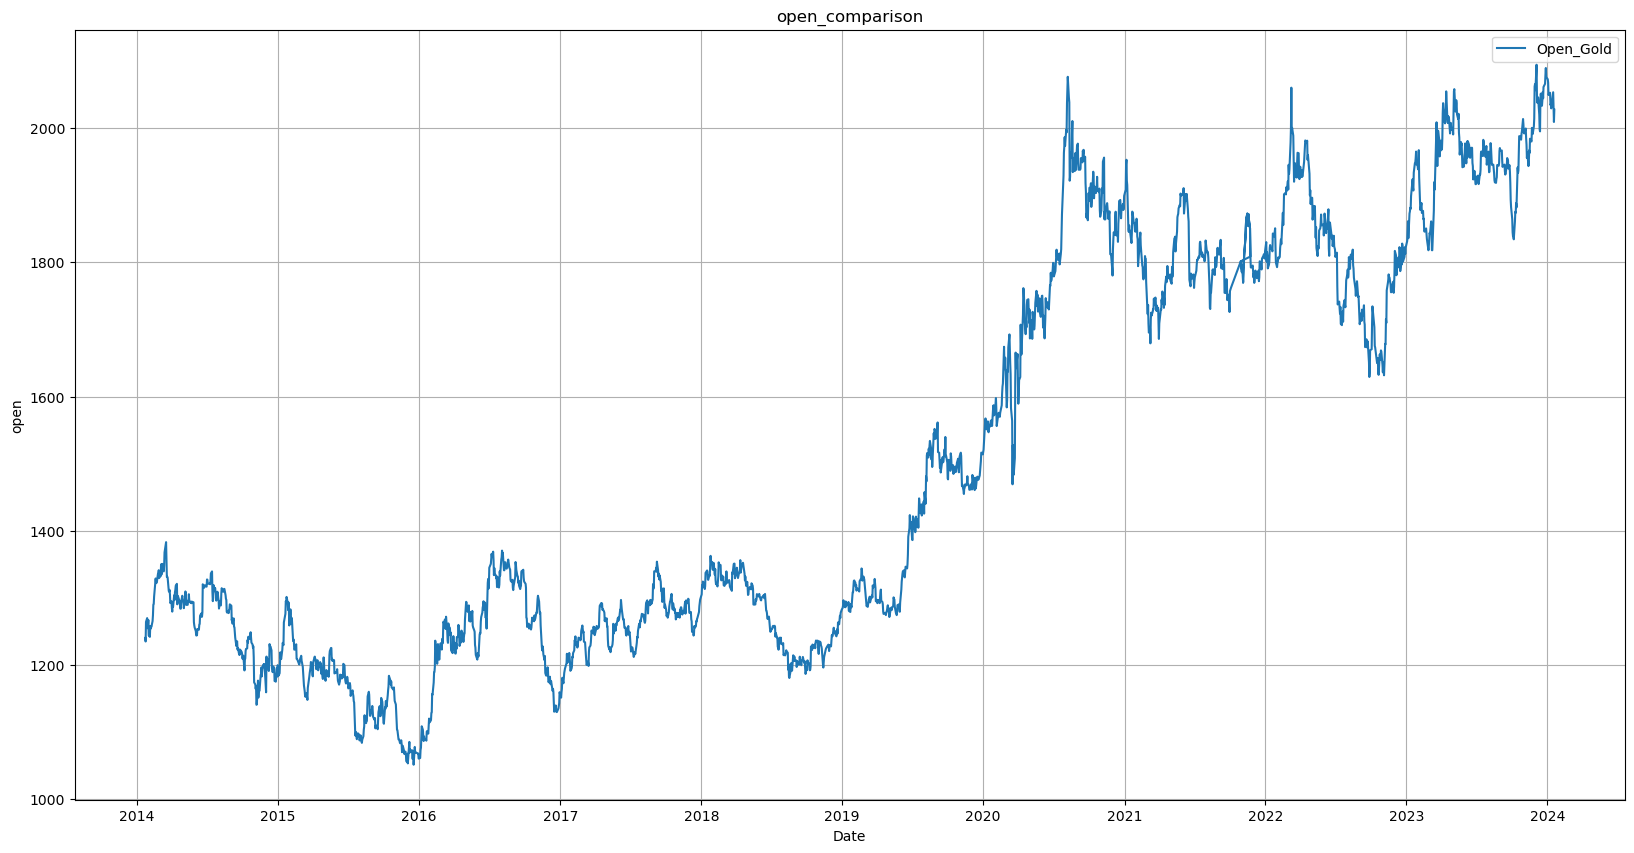

In [80]:
plt.figure(figsize=(20,10))
plt.plot(merged_df["Date"], merged_df["Open_Gold"], label="Open_Gold")
plt.xlabel("Date")
plt.ylabel("open")
plt.title("open_comparison")
plt.legend()
plt.grid(True)

In [27]:
# Add year and month columns
merged_df["year"] = merged_df["Date"].dt.year
merged_df["month"] = merged_df["Date"].dt.month

In [28]:
new_df= merged_df.set_index("Date")

In [29]:
new_df.head()

,Close_Gold,Volume_Gold,Open_Gold,High_Gold,Low_Gold,Price_Bitcoin,Open_Bitcoin,High_Bitcoin,Low_Bitcoin,Volume_Bitcoin,Percentage_change_Bitcoin,year,month
Date,,,,,,,,,,,,,
2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2,41648.0,41293.8,42164.6,40305.4,72640.0,0.0086,2024,1
2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7,41292.7,42763.5,42908.0,40682.6,70350.0,-0.0345,2024,1
2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6,42768.7,43139.1,43192.3,42211.8,50440.0,-0.0087,2024,1
2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6,43145.5,42515.2,43563.7,42093.1,63930.0,0.0149,2024,1
2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1,42835.9,46348.1,46503.2,41857.9,136920.0,-0.0758,2024,1


In [30]:
# Group by year and month and calculate the mean
monthly_average = new_df.groupby(["year", "month"]).mean().reset_index()

In [31]:
monthly_average.head()

,year,month,Close_Gold,Volume_Gold,Open_Gold,High_Gold,Low_Gold,Price_Bitcoin,Open_Bitcoin,High_Bitcoin,Low_Bitcoin,Volume_Bitcoin,Percentage_change_Bitcoin
0,2014,1,1253.012500,85435.250000,1253.962500,1264.887500,1243.400000,936.725000,950.962500,966.762500,922.012500,5888.750000,-0.014462
1,2014,2,1300.721053,119566.526316,1298.015789,1307.473684,1290.257895,511.131579,531.473684,579.747368,479.189474,34142.105263,0.071947
2,2014,3,1336.528571,131182.666667,1334.738095,1346.000000,1326.633333,586.861905,590.728571,610.809524,568.438095,3149.047619,-0.005186
3,2014,4,1298.747619,111595.380952,1297.095238,1306.490476,1290.047619,466.057143,465.014286,488.819048,441.442857,5140.952381,0.004429
4,2014,5,1287.809524,114173.285714,1290.266667,1296.895238,1280.761905,480.704762,474.214286,488.480952,467.395238,2962.380952,0.013695


In [32]:
monthly_average["year_month"] = monthly_average["year"].astype(str) + "-" + monthly_average["month"].astype(str)

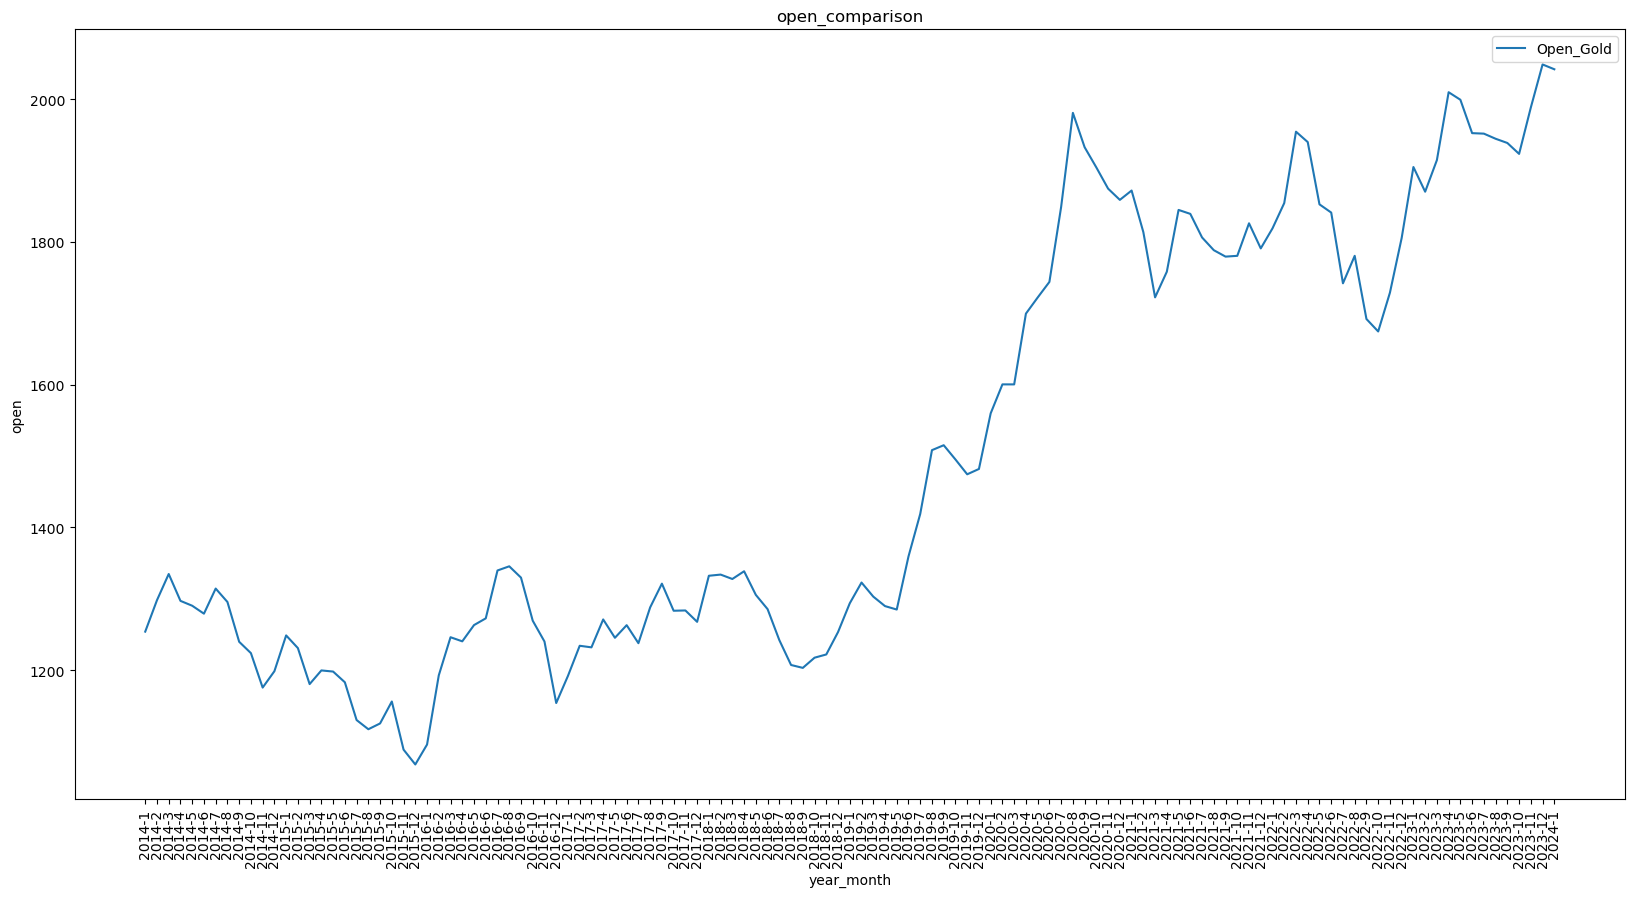

In [78]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(monthly_average["year_month"], monthly_average["Open_Gold"], label="Open_Gold")
plt.xlabel("year_month")
plt.ylabel("open")
plt.title("open_comparison")
plt.legend()


Text(0.5, 1.0, 'open_comparison')

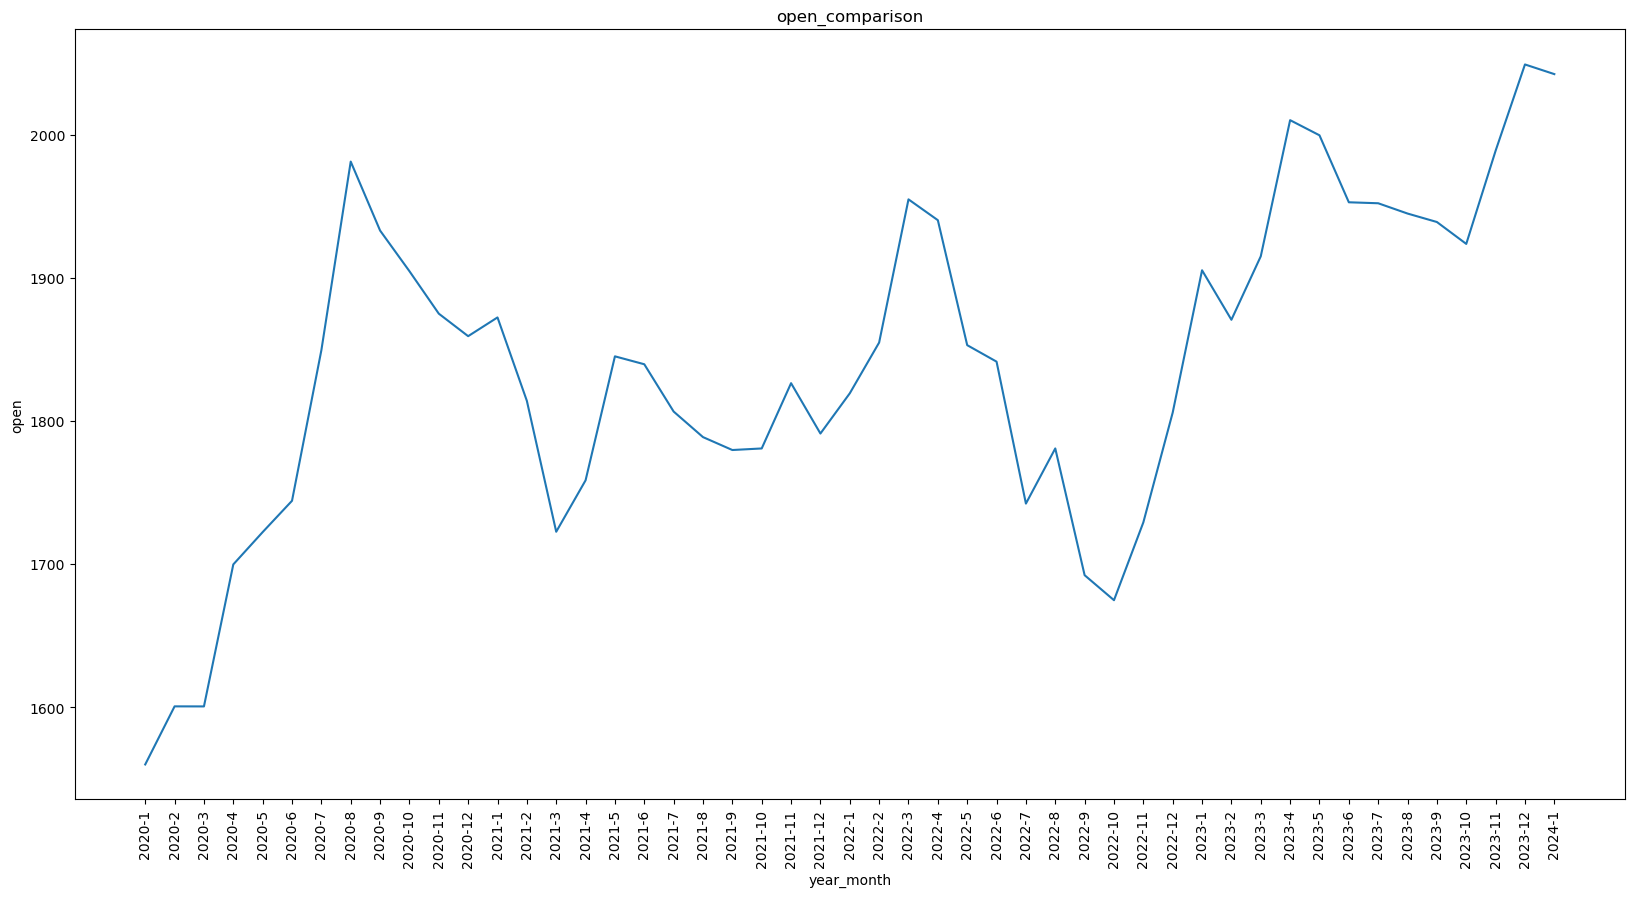

In [84]:
filtered_df = monthly_average[monthly_average['year'] >= 2020]
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.plot(filtered_df["year_month"],filtered_df["Open_Gold"], label="Open_Gold")
plt.xlabel("year_month")
plt.ylabel("open")
plt.title("open_comparison")


# Correlacion de retornos

Un retorno es un cambio porcentual de un dia a otro

In [86]:
merged_df = merged_df.sort_values(by='Date').reset_index(drop=True)

In [88]:
# Suponiendo que  'gold_price' son las columnas de precios
merged_df['gold_returns'] = merged_df['Close_Gold'].pct_change()

In [90]:
merged_df.columns

Index(['Date', 'Close_Gold', 'Volume_Gold', 'Open_Gold', 'High_Gold',
       'Low_Gold', 'Price_Bitcoin', 'Open_Bitcoin', 'High_Bitcoin',
       'Low_Bitcoin', 'Volume_Bitcoin', 'Percentage_change_Bitcoin', 'year',
       'month', 'gold_returns'],
      dtype='object')

In [92]:
# Calcular la correlación entre los retornos
correlation = merged_df[['Percentage_change_Bitcoin', 'gold_returns']].corr()
print('Correlación entre retornos de Bitcoin y Oro:')
print(correlation)

Correlación entre retornos de Bitcoin y Oro:
                           Percentage_change_Bitcoin  gold_returns
Percentage_change_Bitcoin                   1.000000      0.014305
gold_returns                                0.014305      1.000000


# Evaluar coicidencia de movimiento

In [97]:
# Definir si el precio sube (1) o baja (0) para cada día
merged_df['bitcoin_change'] = merged_df['Price_Bitcoin'].diff().apply(lambda x: 1 if x > 0 else 0)
merged_df['gold_change'] = merged_df['Close_Gold'].diff().apply(lambda x: 1 if x > 0 else 0)

In [101]:
merged_df.head()

,Date,Close_Gold,Volume_Gold,Open_Gold,High_Gold,Low_Gold,Price_Bitcoin,Open_Bitcoin,High_Bitcoin,Low_Bitcoin,Volume_Bitcoin,Percentage_change_Bitcoin,year,month,gold_returns,bitcoin_change,gold_change
0,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5,951.0,962.2,973.9,935.0,4780.0,-0.0117,2014,1,NaN,0,0
1,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8,944.2,951.0,958.1,936.3,1970.0,-0.0071,2014,1,0.019296,0,1
2,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9,916.5,944.2,949.5,902.9,6200.0,-0.0292,2014,1,0.001584,0,1
3,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0,943.5,1007.0,1021.5,937.2,8330.0,-0.0630,2014,1,-0.000791,1,0
4,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0,932.7,943.5,972.6,911.7,10410.0,-0.0115,2014,1,-0.010289,0,0


In [103]:
# Contar cuántos días ambos suben o ambos bajan
same_direction_days = (merged_df['bitcoin_change'] == merged_df['gold_change']).sum()
total_days = len(merged_df)

In [105]:
proportion = same_direction_days / total_days

In [107]:
print(f'Proporción de días en los que Bitcoin y Oro se mueven en la misma dirección: {proportion:.2f}')

Proporción de días en los que Bitcoin y Oro se mueven en la misma dirección: 0.53


In [ ]:
#filtered_df = monthly_average[monthly_average['year'] >= 2020]
# Calcular la correlación entre los retornos
# Contar cuántos días ambos suben o ambos bajan